<a href="https://colab.research.google.com/github/hagijakobson/customer-segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation for Marketing Strategy

* Dataset: https://www.kaggle.com/arjunbhasin2013/ccdata



## Introduction

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset:
* **CUSTID**: Identification of Credit Card holder (Categorical)
* **BALANCE**: Balance amount left in their account to make purchases
* **BALANCEFREQUENCY**: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* **PURCHASES**: Amount of purchases made from account
* **ONEOFFPURCHASES**: Maximum purchase amount done in one-go
* **INSTALLMENTSPURCHASES**: Amount of purchase done in installment
* **CASHADVANCE**: Cash in advance given by the user
* **PURCHASESFREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **ONEOFFPURCHASESFREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASESINSTALLMENTSFREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* **CASHADVANCEFREQUENCY**: How frequently the cash in advance being paid
* **CASHADVANCETRX**: Number of Transactions made with "Cash in Advanced"
* **PURCHASESTRX**: Numbe of purchase transactions made
* **CREDITLIMIT**: Limit of Credit Card for user
* **PAYMENTS**: Amount of Payment done by user
* **MINIMUM_PAYMENTS**: Minimum amount of payments made by user
* **PRCFULLPAYMENT**: Percent of full payment paid by user
* **TENURE**: Tenure of credit card service for user
 

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Dataset

In [2]:
creditcard_df = pd.read_csv('/content/Marketing_data.csv', index_col='CUST_ID')

In [3]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [4]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

## Data Cleaning

### Identify and Delete Columns (Features) That Contain a Single Value

In [6]:
creditcard_df.nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

All columns have more than one value.

### Identify and Delete Rows (Records) that Contain Duplicate Data

In [7]:
# calculate duplicates
dups = creditcard_df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(creditcard_df[dups])

False
Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []


There are no duplicate records in the dataset.

### Identify and Remove Columns (Features) That Have A Low Variance

For this dataset I will not apply this step.

### Dealing with missing values

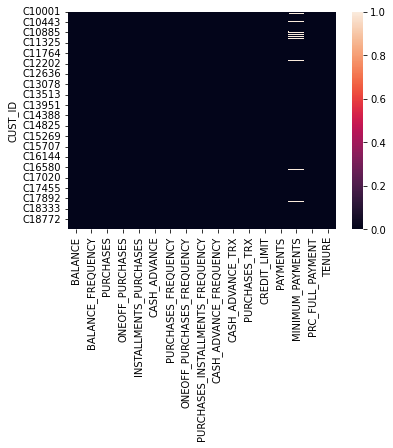

In [8]:
sns.heatmap(creditcard_df.isnull());

In [9]:
creditcard_df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [11]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [12]:
creditcard_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

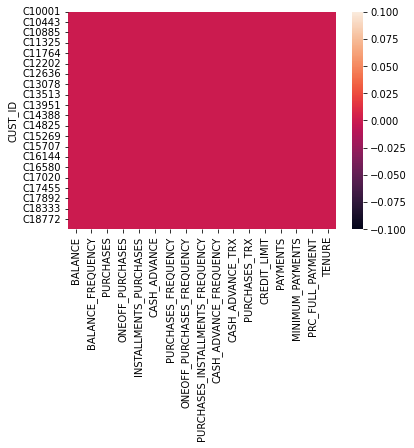

In [13]:
sns.heatmap(creditcard_df.isnull());

## Exploratory Data Analysis

### Statistics summary

In [14]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Feature distributions

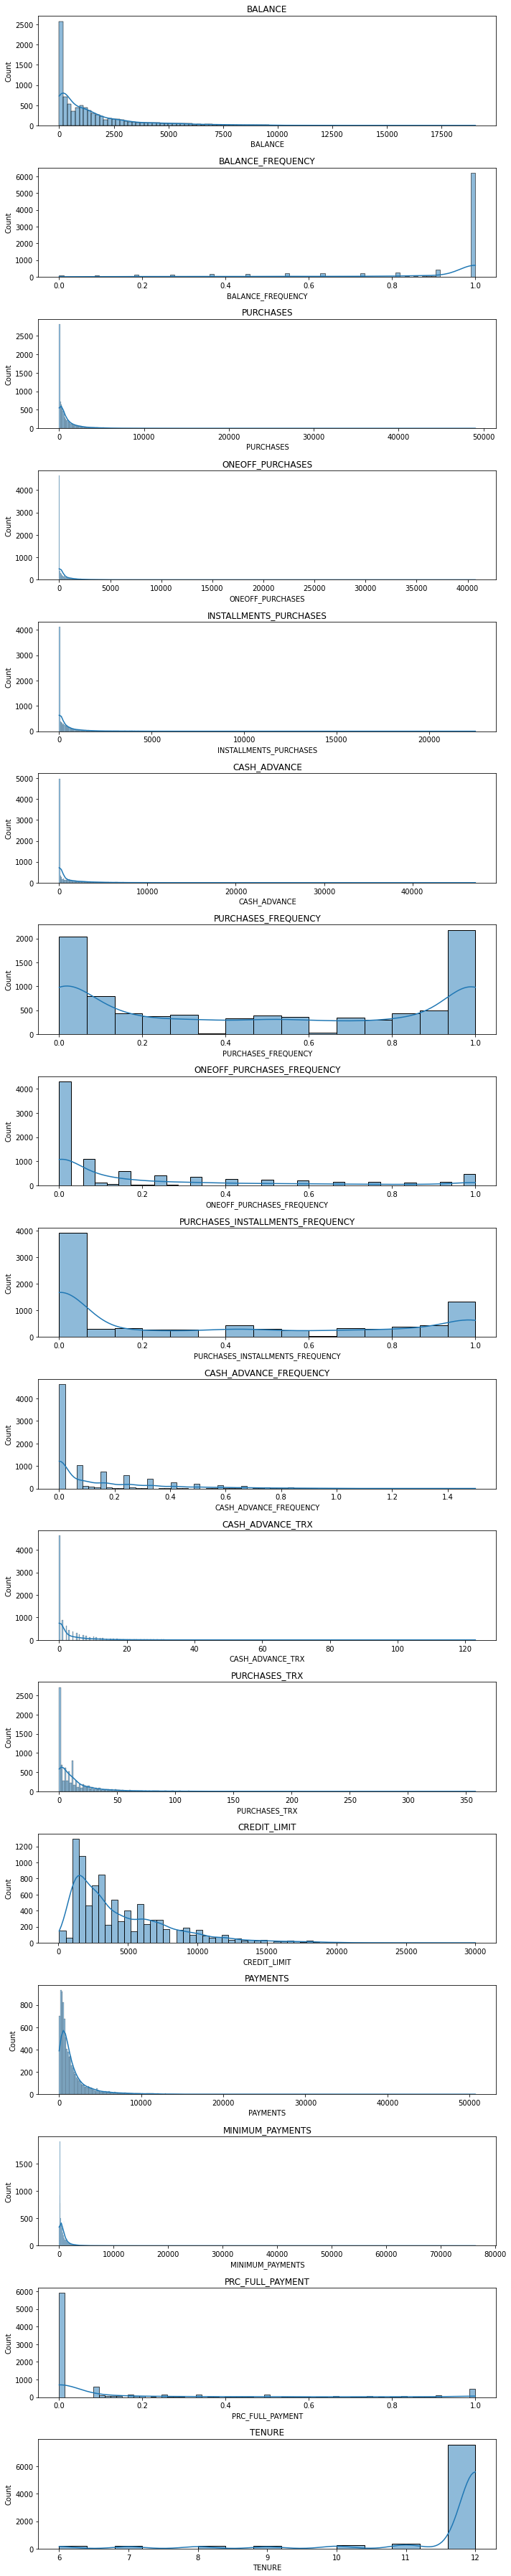

In [15]:
fig, axes = plt.subplots(17, 1,figsize=(10,50))
i = 0
for column in creditcard_df.columns:
    sns.histplot(data=creditcard_df, x=column, kde = True, ax=axes[i])
    axes[i].title.set_text(column)
    i+=1
plt.tight_layout();

### Feature correlations

In [16]:
correlations = creditcard_df.corr()

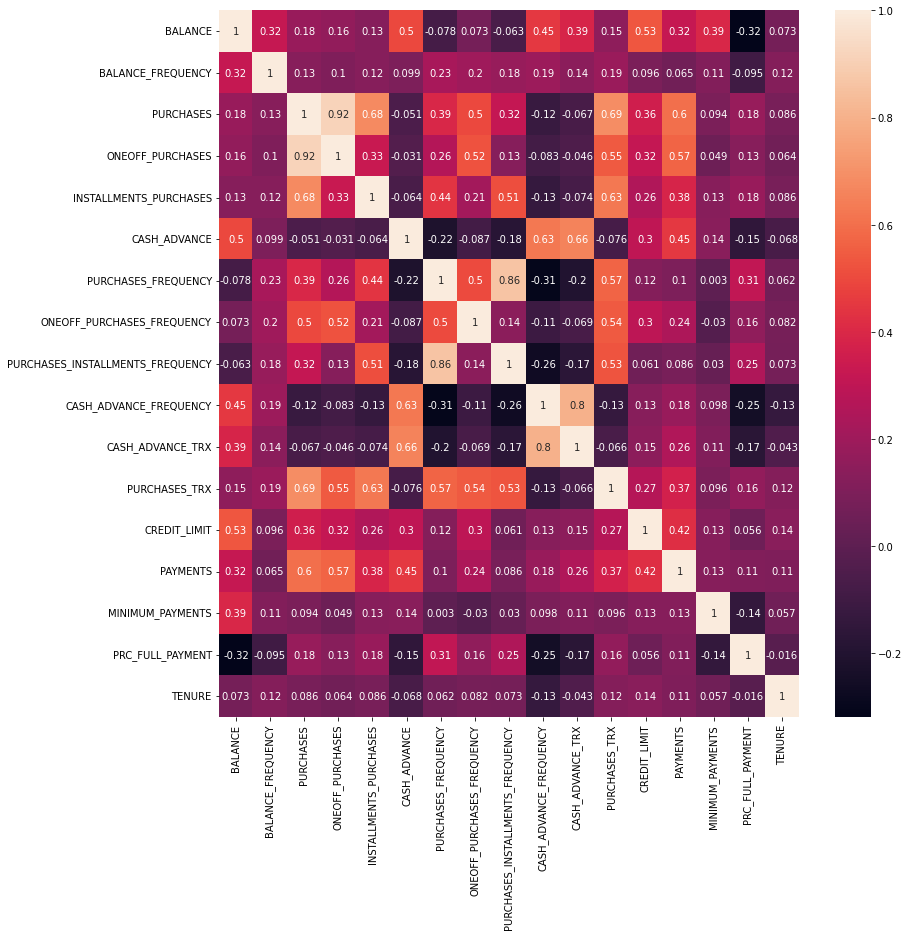

In [17]:
f, ax = plt.subplots(figsize=(13,13))
sns.heatmap(correlations, annot=True);

## Clustering

### Setting the number of clusters using the Elbow Method

- More details 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [18]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [19]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    wcss_1.append(kmeans.inertia_)

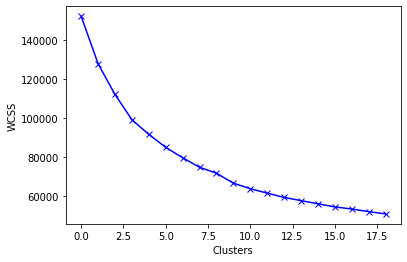

In [20]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

### K-means

In [27]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [28]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([ 600, 1638,   54, 2636,   25,  812, 1089, 1047,  703,  346]))

In [29]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])

In [30]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,910.503069,0.792930,372.813700,238.813283,134.500417,1173.774065,0.389511,0.117102,0.256047,0.206955,3.405000,4.851667,2449.190749,594.526710,386.394349,0.129567,7.200000
1,1161.723331,0.965346,934.031545,254.187509,680.335061,320.573437,0.862160,0.113951,0.810320,0.059249,1.192308,19.677656,3509.977368,1182.114230,791.952506,0.053715,11.893773
2,3874.347938,0.988216,738.477778,101.711296,636.766481,906.404863,0.451740,0.036055,0.420455,0.106481,2.981481,15.648148,4111.111111,1386.179670,23026.762059,0.001543,11.907407
3,1606.453998,0.972703,221.916487,184.371165,37.733061,826.982419,0.130524,0.081258,0.049432,0.163140,3.213202,2.391123,3415.408447,1024.328589,721.927196,0.020879,11.882398
4,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
5,5118.984748,0.969724,541.127463,344.572857,196.679815,5381.570255,0.296236,0.142534,0.195303,0.528188,16.924877,8.070197,8353.577026,4261.434408,1762.672400,0.040414,11.608374
6,108.221044,0.350625,314.287502,200.954986,113.605060,326.064082,0.246722,0.069539,0.172010,0.033540,0.748393,3.956841,3805.752474,1150.358230,276.324399,0.184173,11.770432
7,1285.687249,0.972599,2151.761643,1731.981500,419.780143,288.232401,0.880449,0.789054,0.402577,0.053063,1.006686,29.719198,6129.634453,2121.693871,494.619133,0.267487,11.876791
8,98.163107,0.887227,967.649986,176.015092,791.761465,24.101008,0.837988,0.088395,0.771772,0.004129,0.068279,17.152205,4049.149748,1094.164765,185.224641,0.784446,11.657183
9,3715.714812,0.988939,6382.260145,3729.380665,2654.613584,641.072142,0.958911,0.690690,0.867341,0.078731,2.109827,93.187861,9192.485549,5956.711633,1730.683366,0.224640,11.968208


In [41]:
creditcard_df_cluster = pd.concat([creditcard_df, 
                                   pd.DataFrame(data={'cluster': labels}, 
                                                index=creditcard_df.index)], 
                                  axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


### Cluster feature distributions

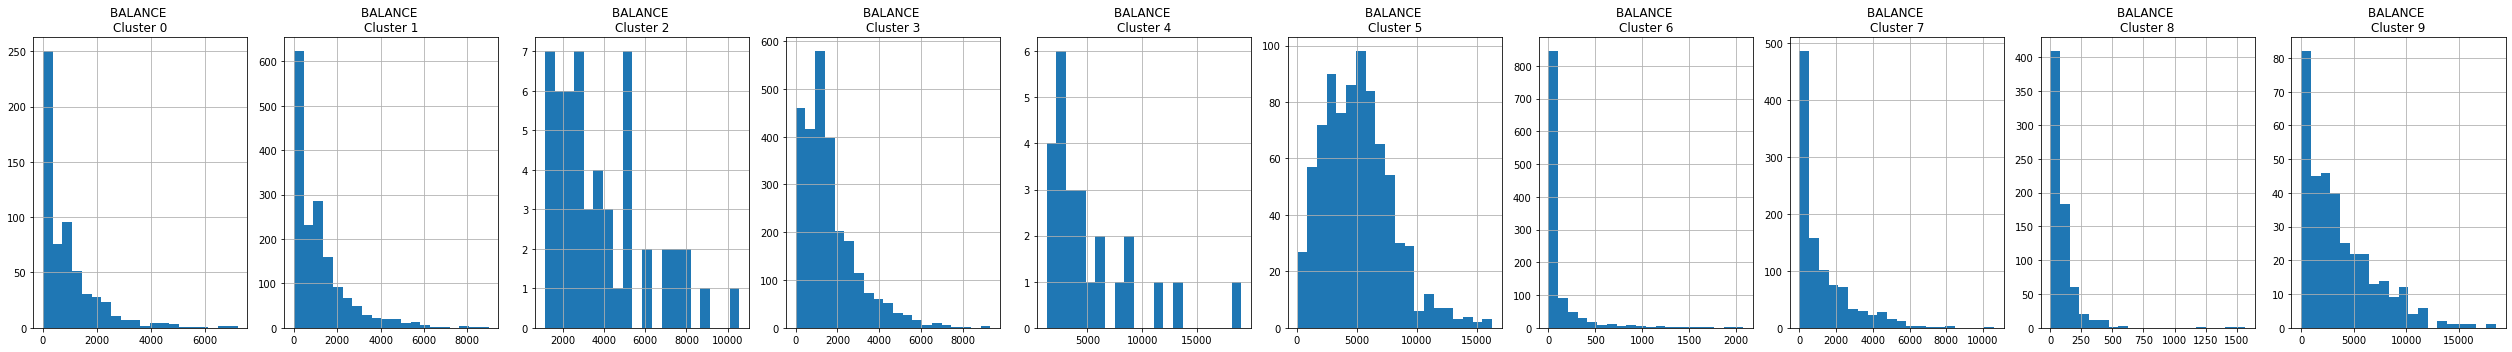

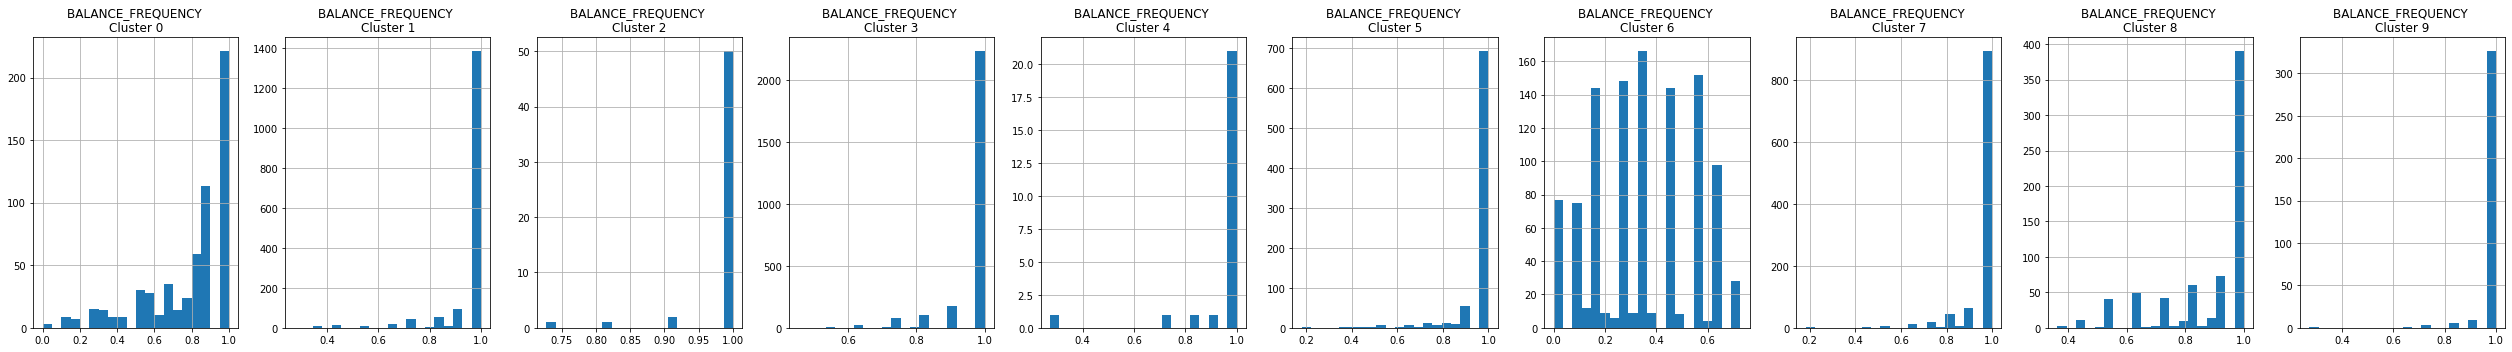

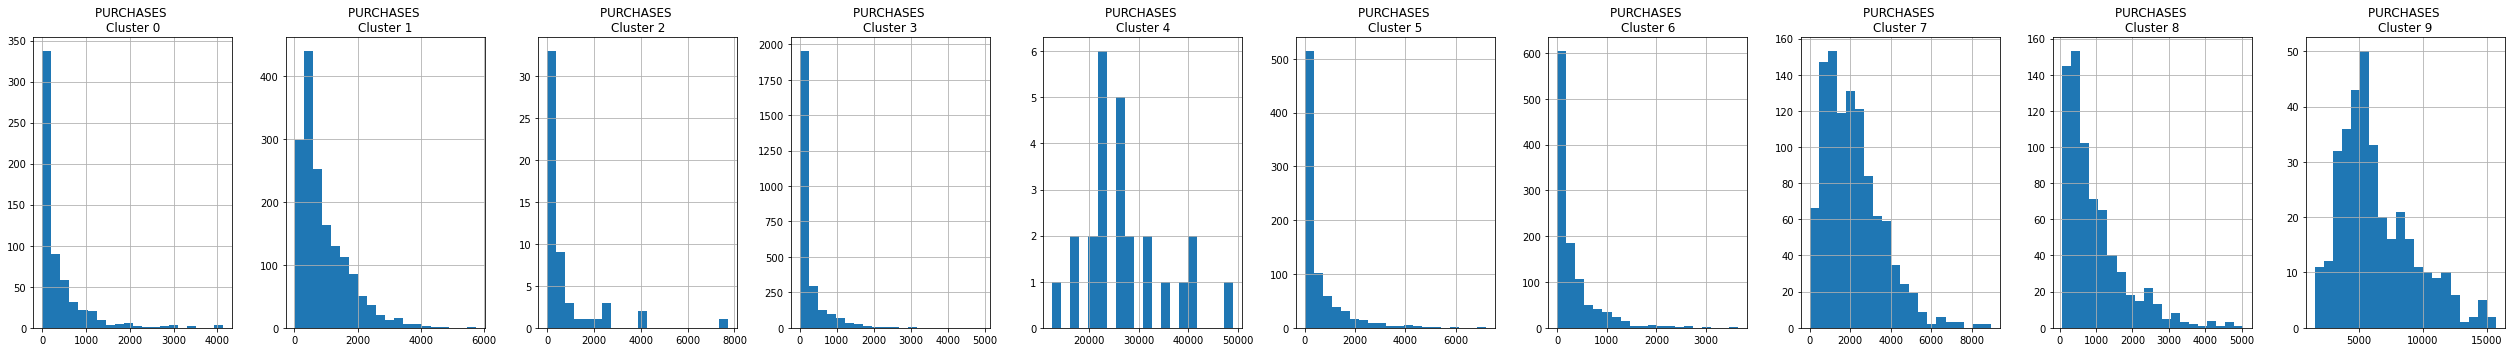

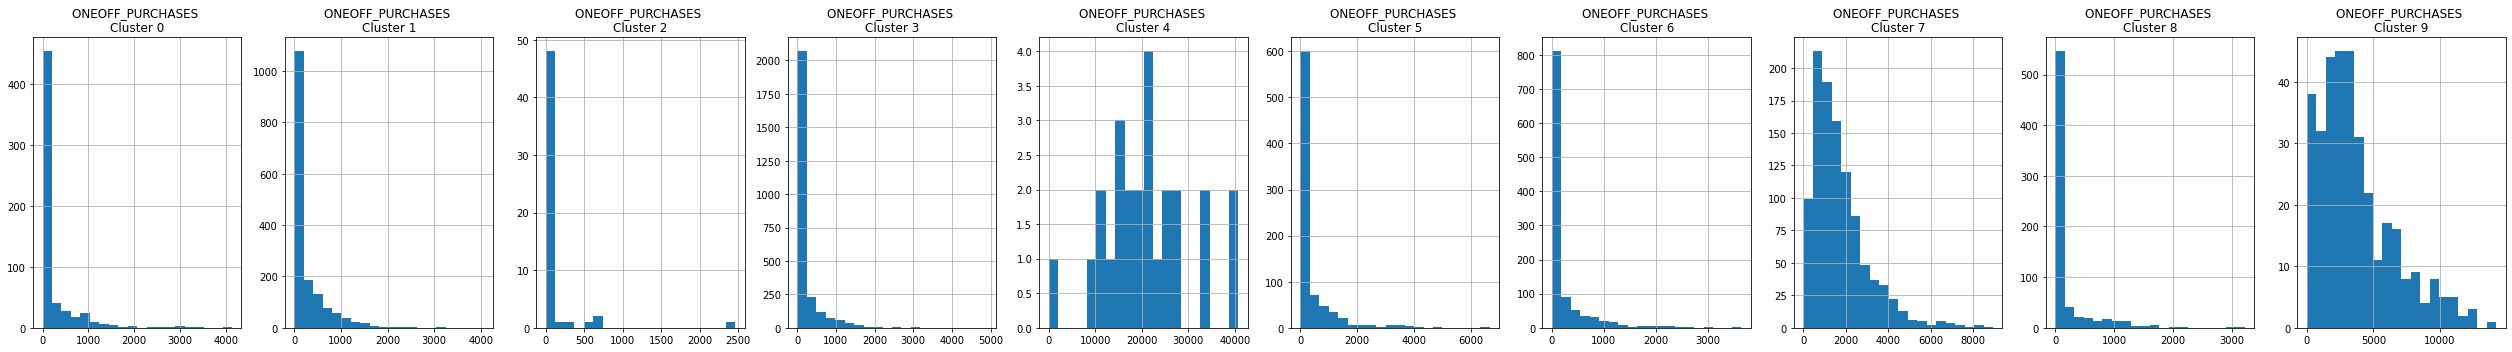

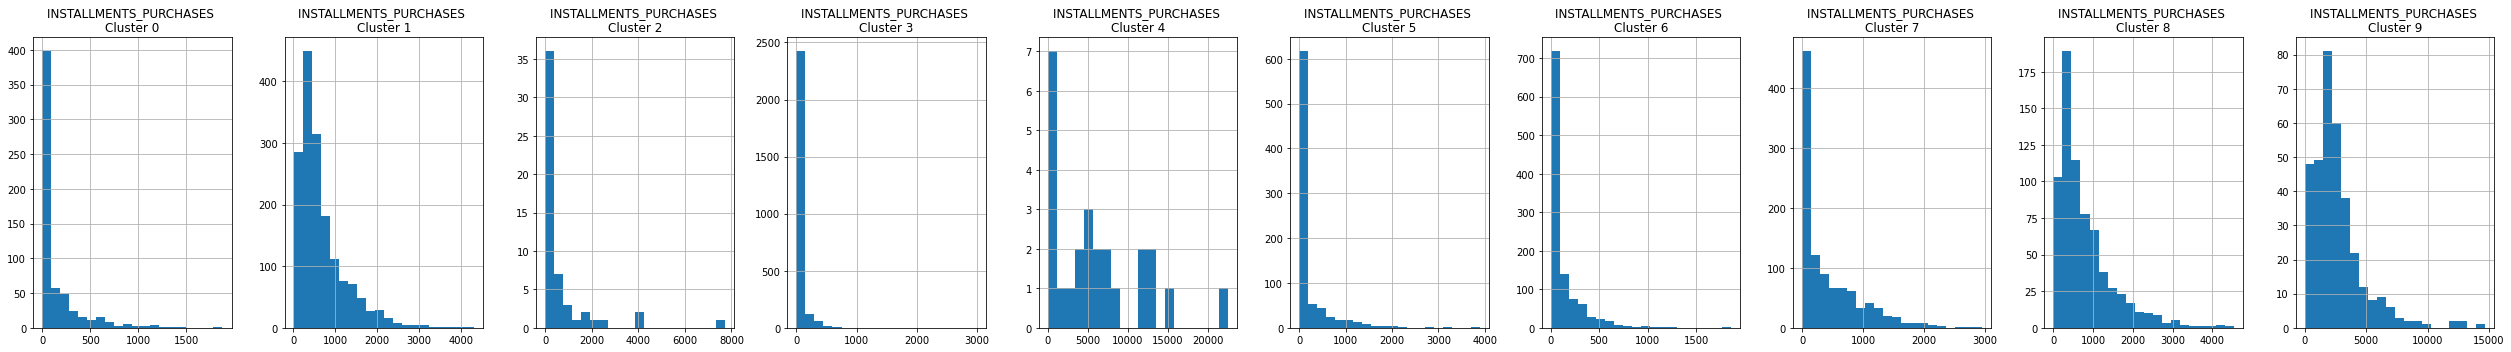

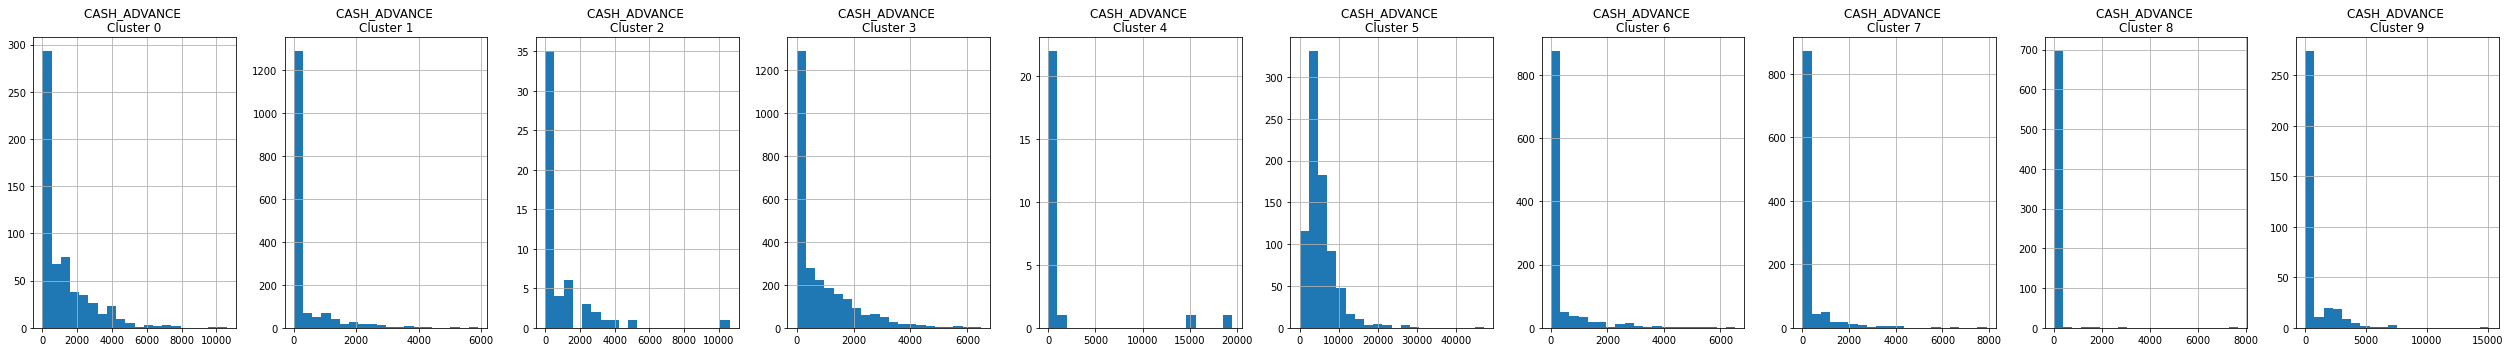

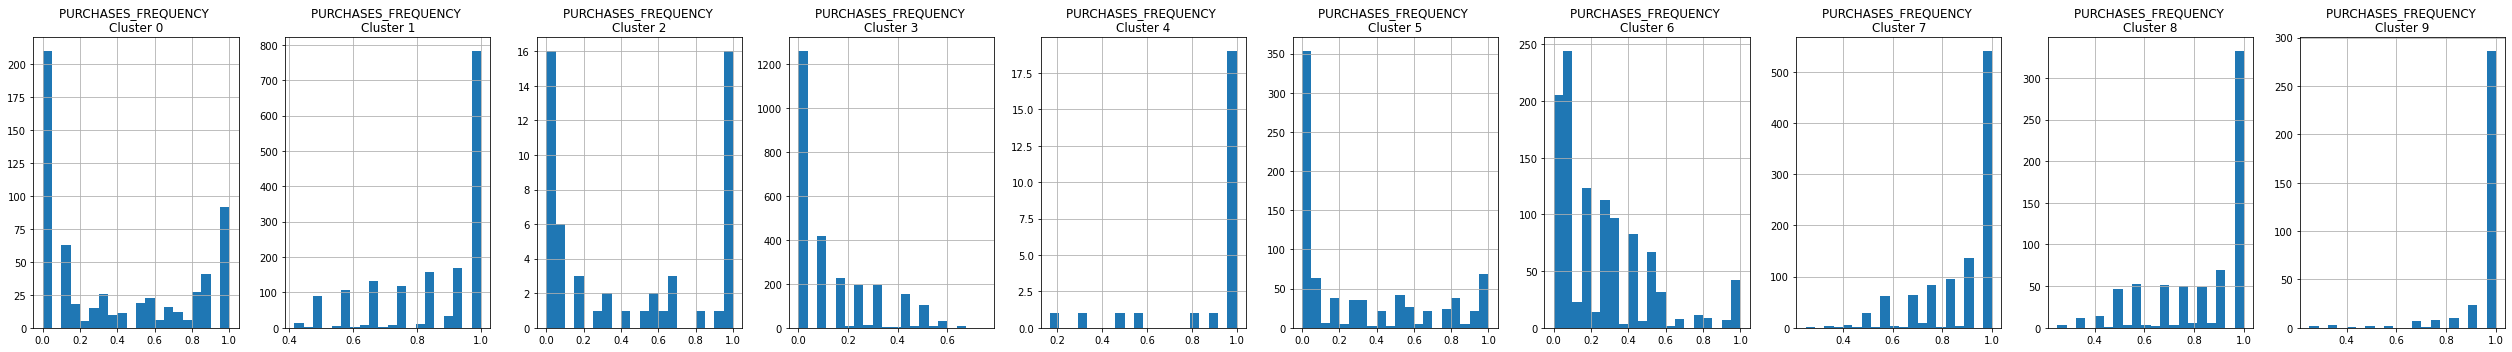

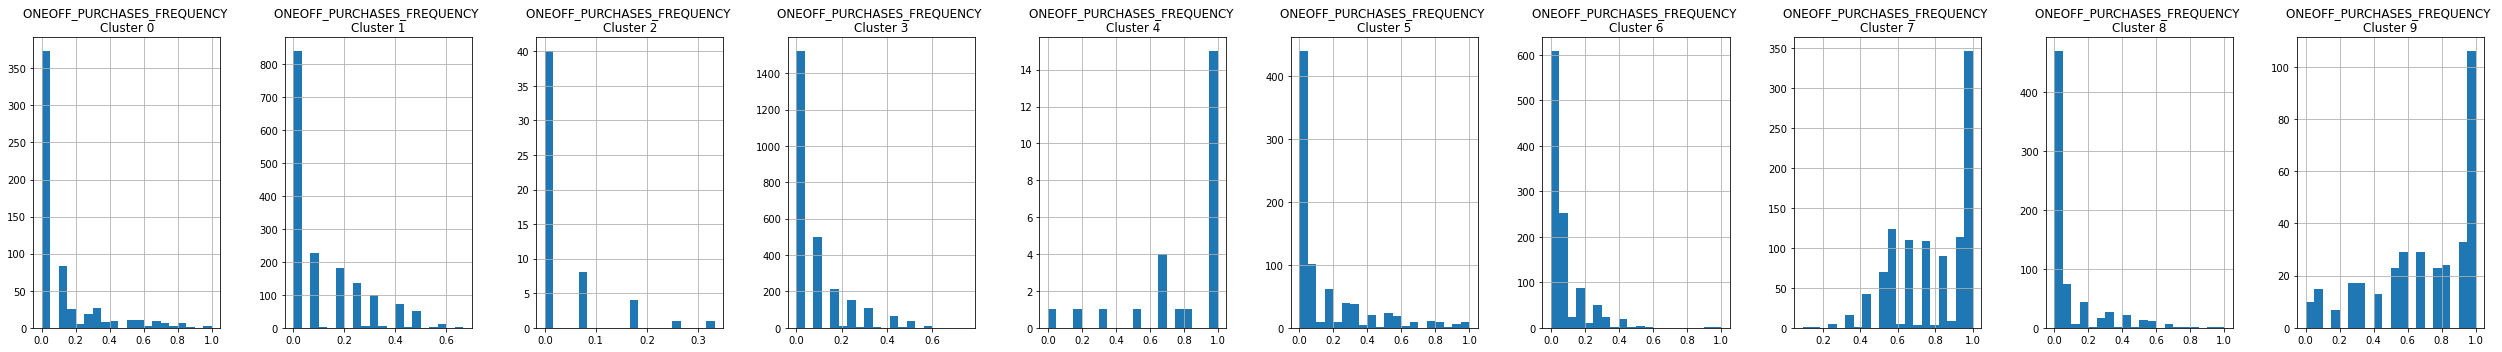

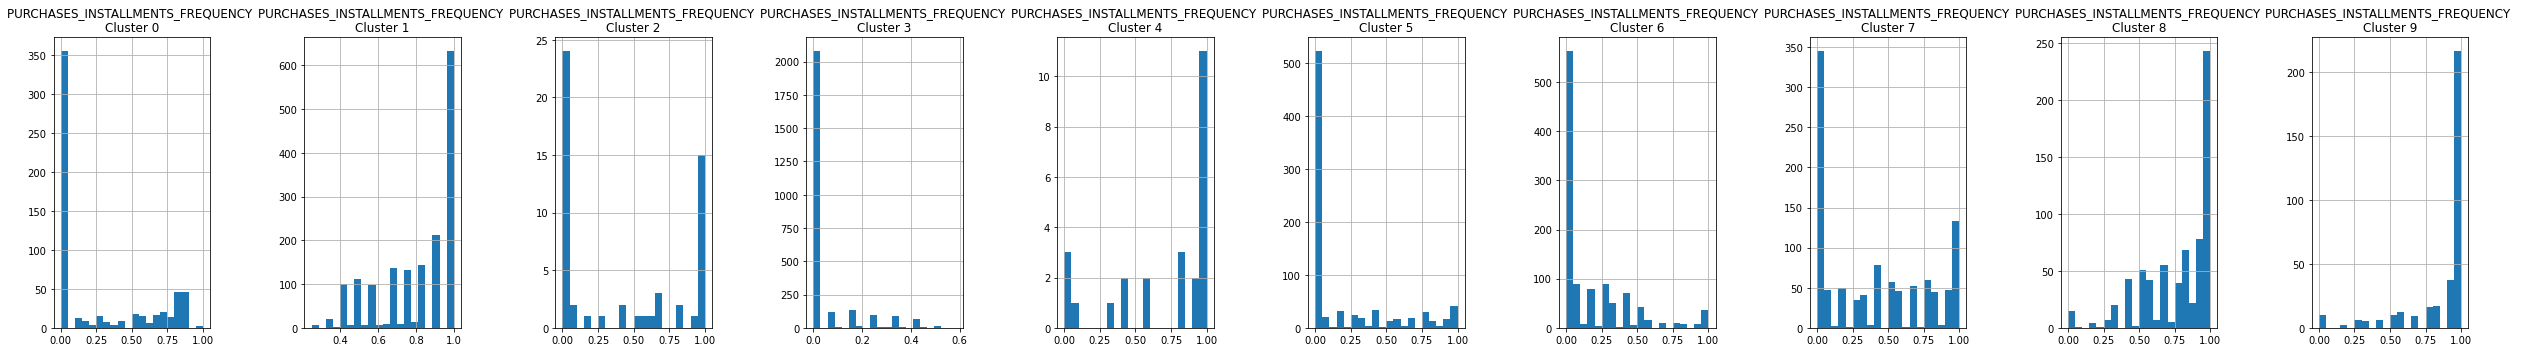

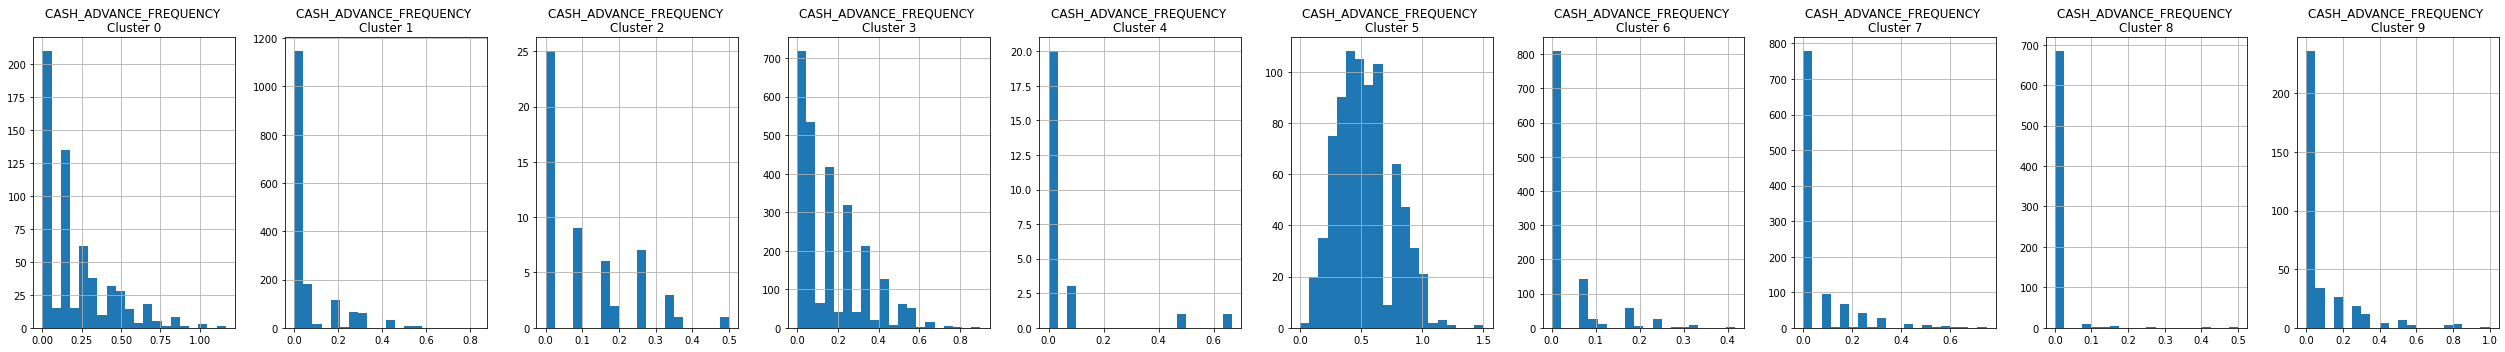

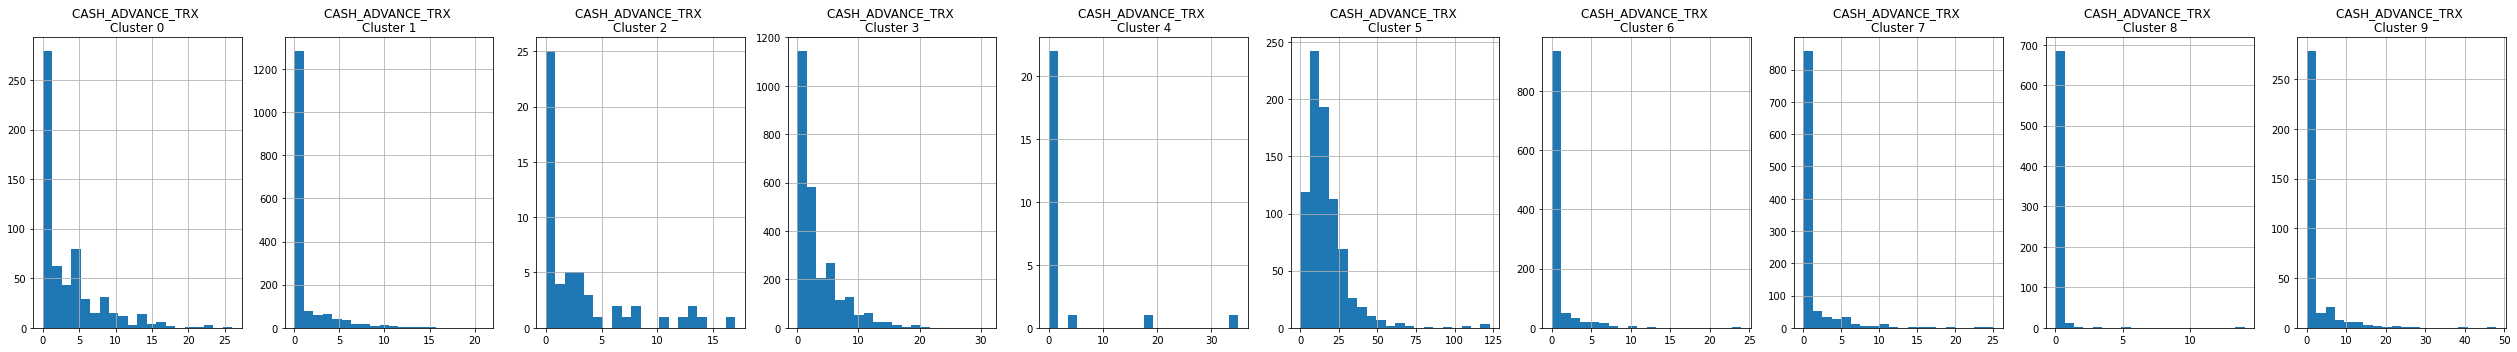

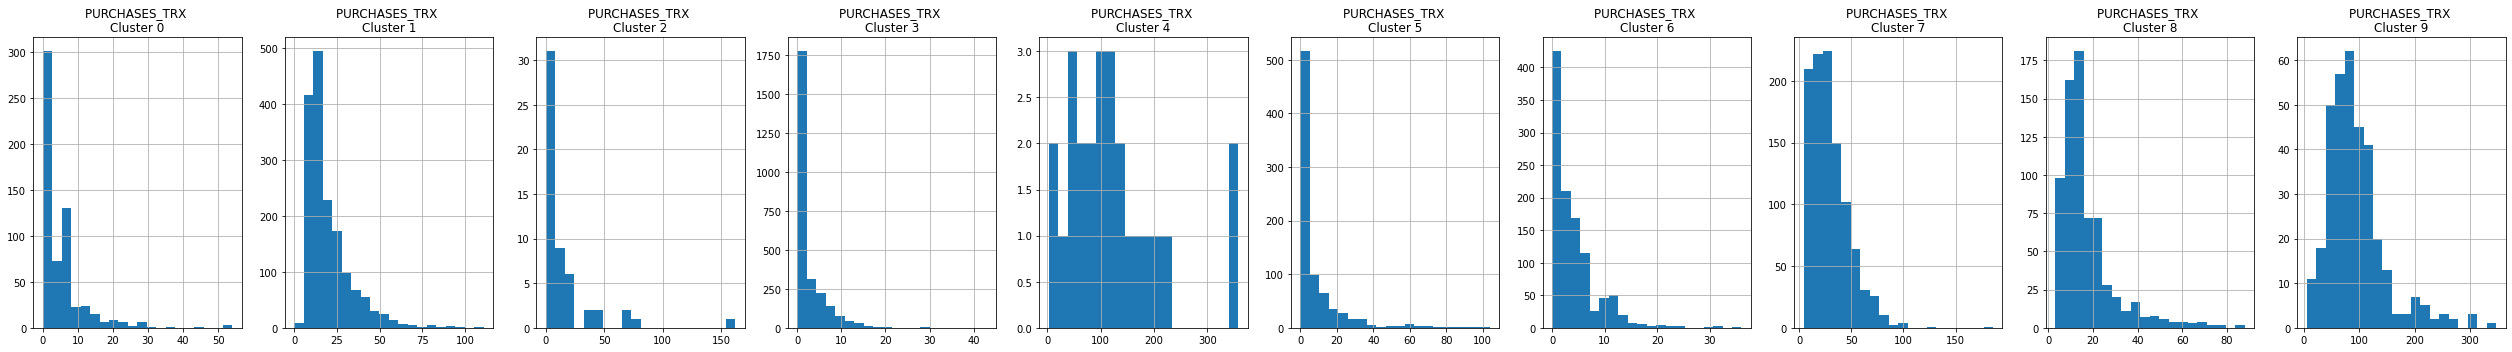

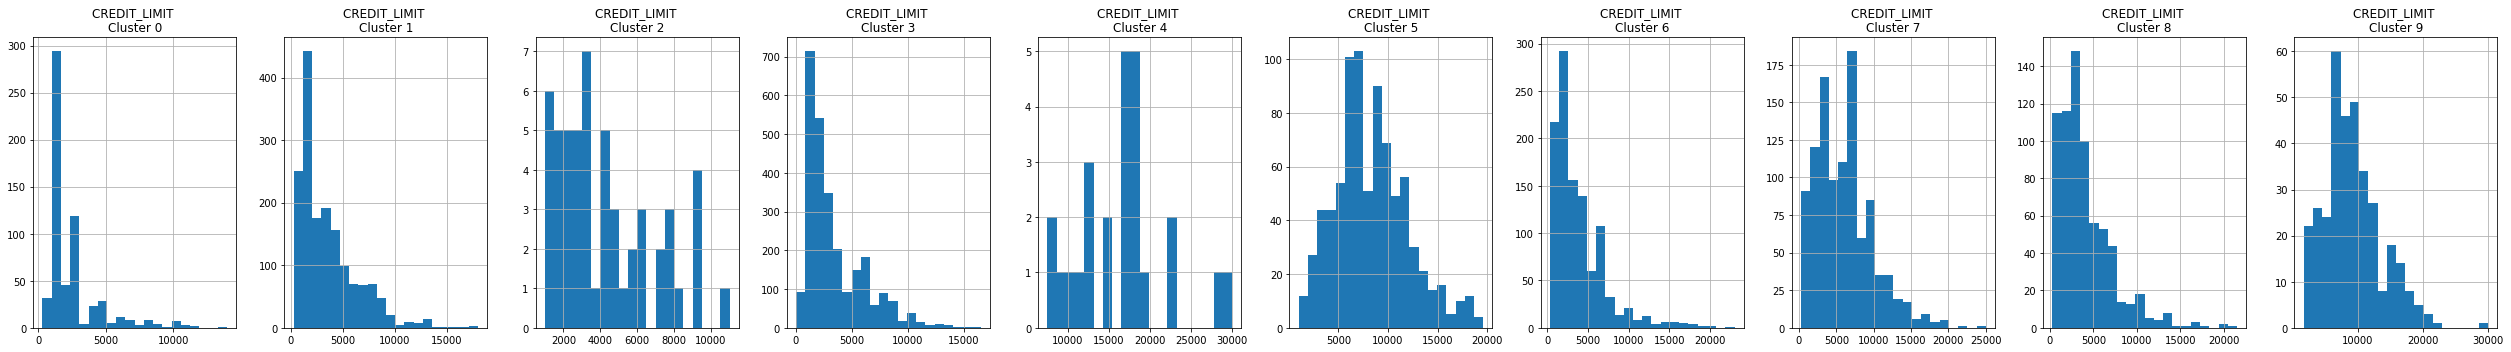

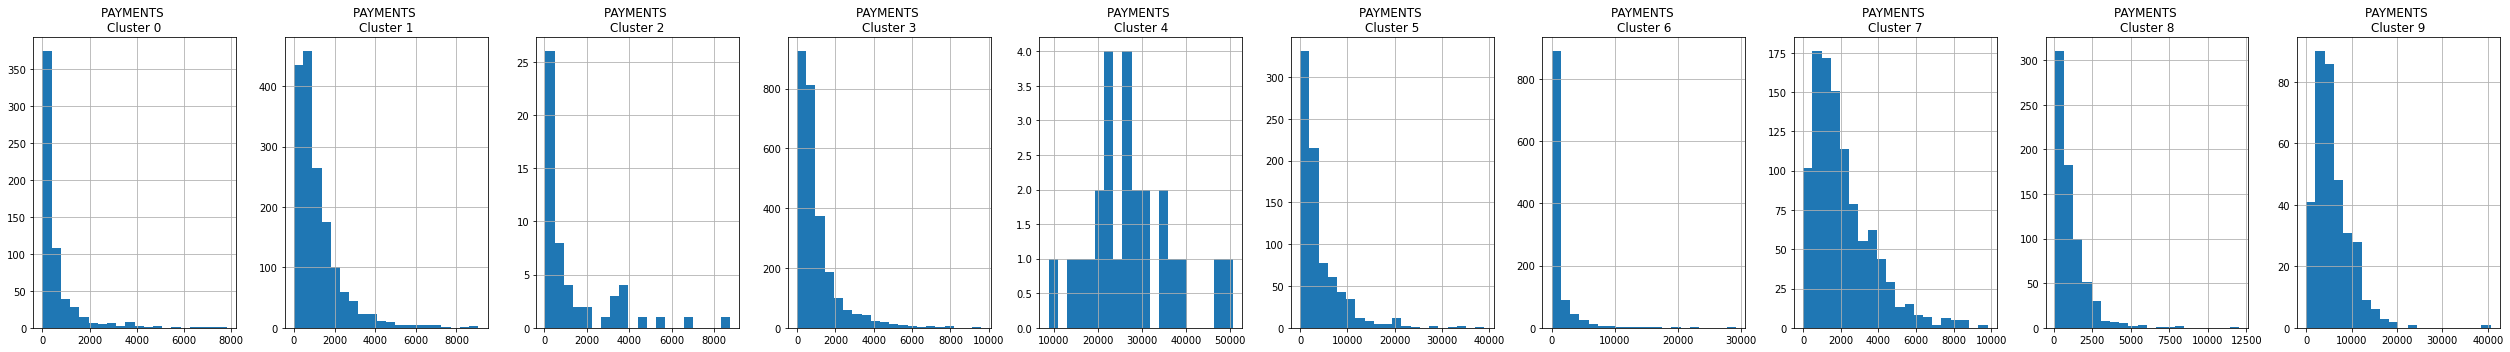

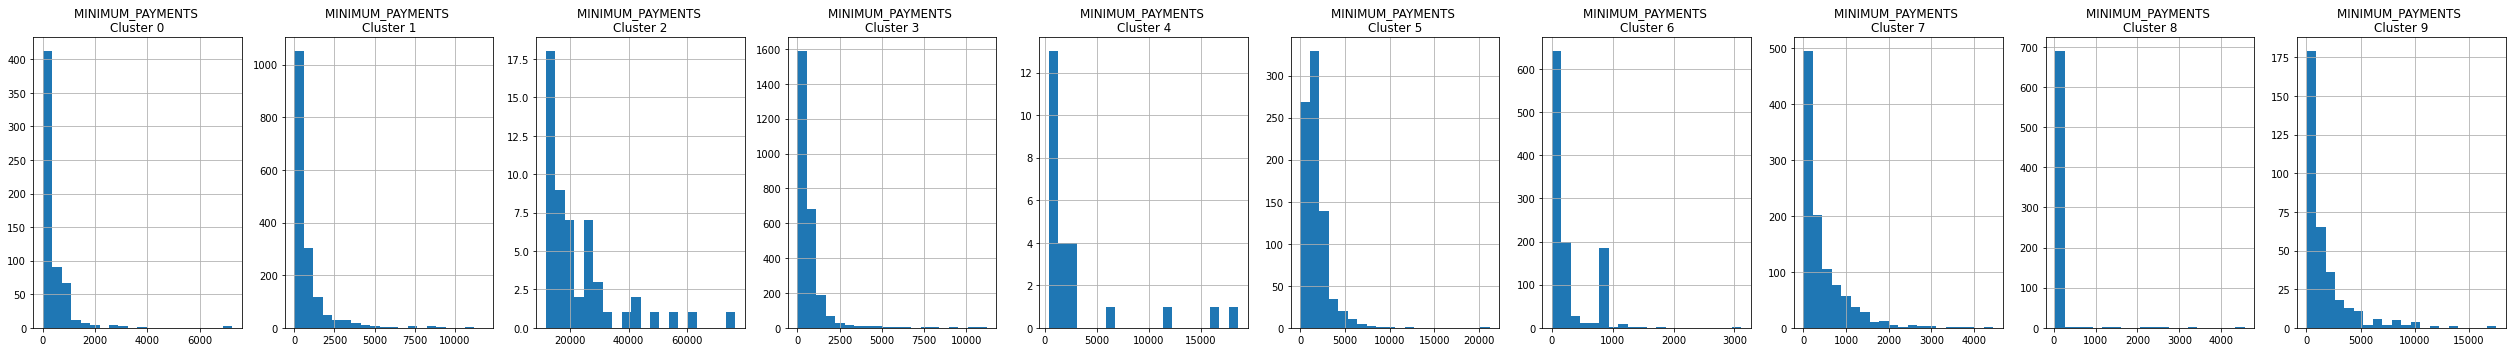

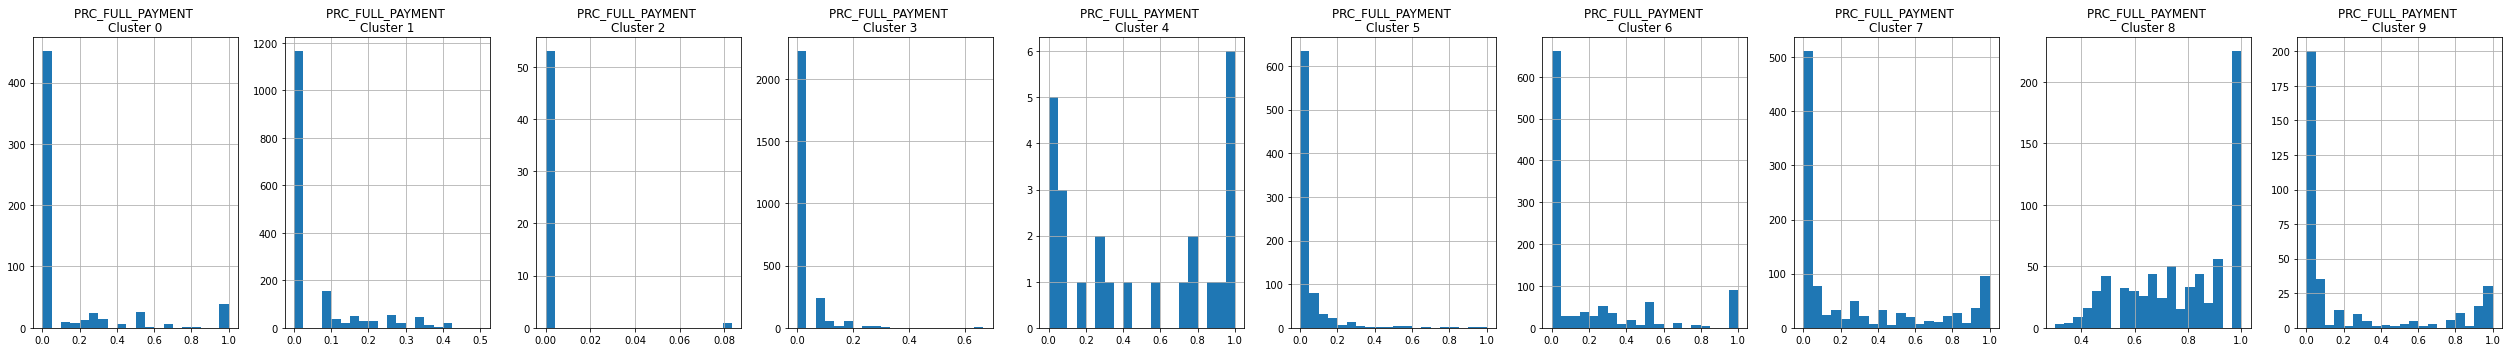

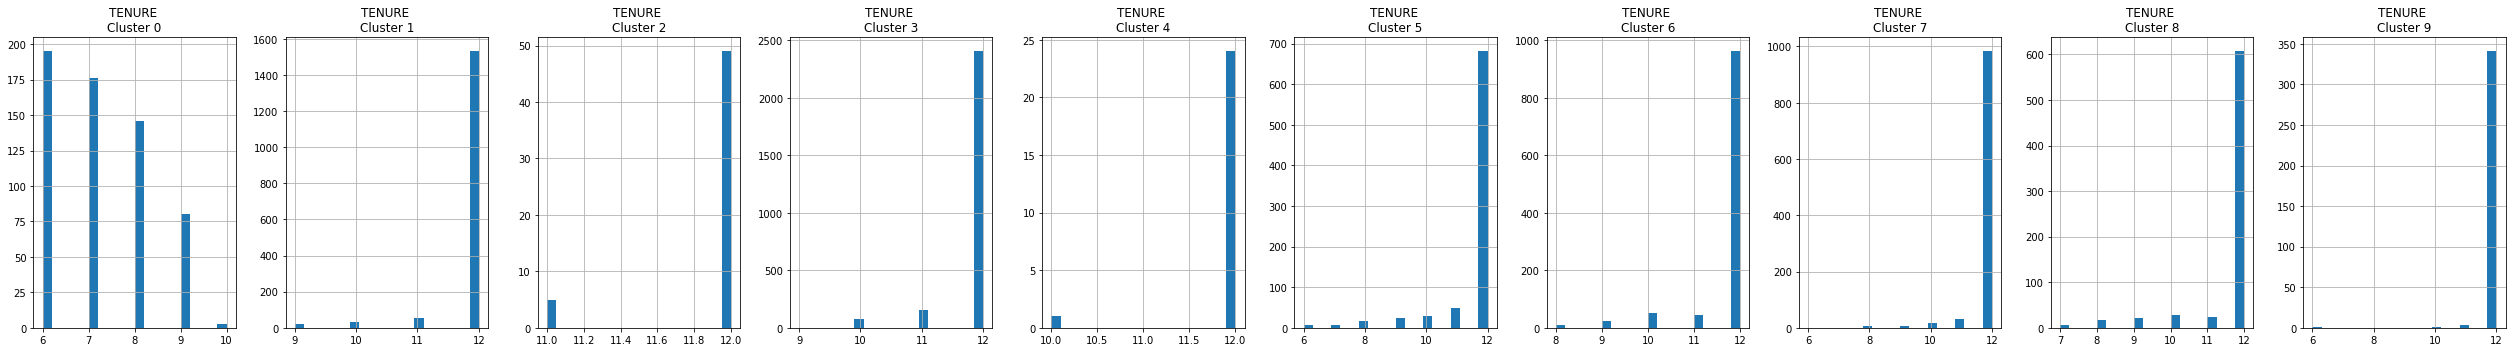

In [42]:
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(10):
        plt.subplot(1, 10, j + 1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{} \nCluster {}'.format(i, j))
    plt.tight_layout();
    plt.show()

### Cluster features average


In [43]:
creditcard_df_cluster.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,910.503069,0.792930,372.813700,238.813283,134.500417,1173.774065,0.389511,0.117102,0.256047,0.206955,3.405000,4.851667,2449.190749,594.526710,386.394349,0.129567,7.200000
1,1161.723331,0.965346,934.031545,254.187509,680.335061,320.573437,0.862160,0.113951,0.810320,0.059249,1.192308,19.677656,3509.977368,1182.114230,791.952506,0.053715,11.893773
2,3874.347938,0.988215,738.477778,101.711296,636.766481,906.404863,0.451740,0.036055,0.420455,0.106481,2.981481,15.648148,4111.111111,1386.179670,23026.762059,0.001543,11.907407
3,1606.453998,0.972703,221.916487,184.371165,37.733061,826.982419,0.130524,0.081258,0.049432,0.163140,3.213202,2.391123,3415.408447,1024.328589,721.927196,0.020879,11.882398
4,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
5,5118.984748,0.969724,541.127463,344.572857,196.679815,5381.570255,0.296236,0.142534,0.195303,0.528188,16.924877,8.070197,8353.577026,4261.434408,1762.672400,0.040414,11.608374
6,108.221044,0.350625,314.287502,200.954986,113.605060,326.064082,0.246722,0.069539,0.172010,0.033540,0.748393,3.956841,3805.752474,1150.358230,276.324399,0.184173,11.770432
7,1285.687249,0.972599,2151.761643,1731.981500,419.780143,288.232401,0.880449,0.789054,0.402577,0.053063,1.006686,29.719198,6129.634453,2121.693871,494.619133,0.267487,11.876791
8,98.163107,0.887227,967.649986,176.015092,791.761465,24.101008,0.837988,0.088395,0.771772,0.004129,0.068279,17.152205,4049.149748,1094.164765,185.224641,0.784446,11.657183


In [44]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
CUST_ID,,,,,,,,,,,,,,,,,,
C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6,0
C11402,4240.449485,1.000000,2798.36,2798.36,0.00,48.462980,0.428571,0.428571,0.000000,0.142857,1,4,4500.0,539.231042,931.531127,0.0,7,0
C17361,231.859622,0.888889,190.00,190.00,0.00,108.768879,0.111111,0.111111,0.000000,0.111111,2,1,1200.0,119.940752,128.955873,0.0,9,0
C11431,1.753241,0.571429,0.00,0.00,0.00,390.929830,0.000000,0.000000,0.000000,0.142857,2,0,3000.0,704.789521,46.396619,1.0,7,0
C17318,55.176498,1.000000,283.02,0.00,283.02,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,213.493415,86.257328,1.0,6,0


In [45]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
CUST_ID,,,,,,,,,,,,,,,,,,
C10752,1355.180523,0.909091,8820.67,2549.65,6271.02,0.000000,0.75,0.583333,0.583333,0.000000,0,37,6500.0,3609.323897,416.412205,0.000000,12,9
C11786,467.244925,1.000000,4001.70,1769.36,2232.34,0.000000,1.00,0.583333,1.000000,0.000000,0,109,16000.0,2259.241805,183.138427,0.181818,12,9
C17579,4228.417754,1.000000,11994.71,11994.71,0.00,496.521561,0.25,0.250000,0.000000,0.083333,2,8,13450.0,508.797444,1725.645623,0.000000,12,9
C16198,4507.000722,1.000000,7394.18,2288.20,5105.98,5424.701791,1.00,0.916667,1.000000,0.833333,40,130,11000.0,10460.879460,1076.589500,0.000000,12,9
C16674,382.979758,1.000000,3487.08,484.59,3002.49,0.000000,1.00,0.333333,1.000000,0.000000,0,143,6000.0,3652.818025,174.214771,0.916667,12,9


In [46]:
credit_ordered.to_csv('cluster.csv')

## Dimensionality Reduction and Visualization with t-SNE

In [47]:
from sklearn.manifold import TSNE
tsne_comp = TSNE(n_components=2, learning_rate='auto',
                 init='random').fit_transform(creditcard_df_scaled)

In [48]:
tsne_df = pd.DataFrame(data = tsne_comp, columns=['embedd1', 'embedd2'])
tsne_df.head()

,embedd1,embedd2
0,4.326749,-29.205933
1,-56.720936,6.570866
2,-0.745229,33.900600
3,10.102719,-46.014431
4,-2.134861,-22.286612


In [49]:
tsne_df = pd.concat([tsne_df, pd.DataFrame({'cluster': labels})], axis = 1)
tsne_df.head()

,embedd1,embedd2,cluster
0,4.326749,-29.205933,3
1,-56.720936,6.570866,5
2,-0.745229,33.900600,7
3,10.102719,-46.014431,3
4,-2.134861,-22.286612,3


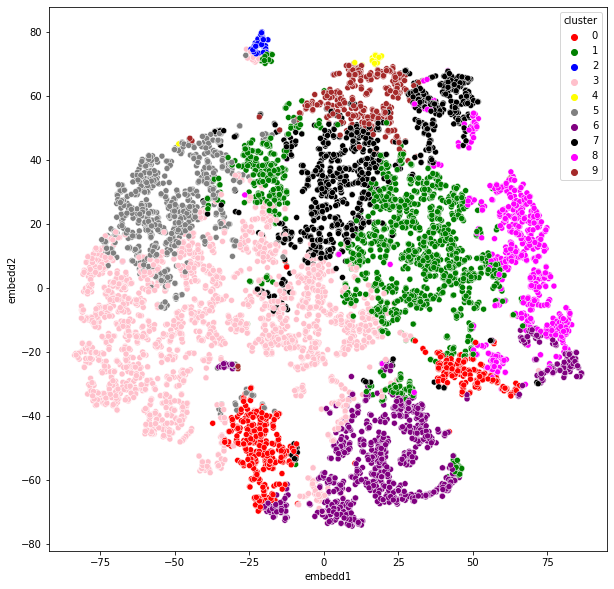

In [50]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'embedd1', y = 'embedd2', hue = 'cluster', 
                data = tsne_df, 
                palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray','purple', 'black','magenta','brown'])

## Insights

* Grupo 0 (clientes novos): Clientes mais novos (média de 7.2 anos) e que mantém pouco dinheiro na conta corrente (média de \$910)
* Grupo 4 (VIP/Prime): Limite do cartão alto (média de \$16360), compras frequentes no cartão (média de 0.89/1) e alto percentual de pagamento de fatura completa (média de 49%). Aumentar limite de crédito do cartão;
* Grupo 5: Usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (média de \$5119) e sacam muito dinheiro do cartão de crédito (média de \$5382), compram pouco (média de 0.3/1) e usam bastante o limite do cartão para saques (média de 0.53/1). Pagam muito pouco a fatura completa (média de 0.04/1);
* Grupo 8: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possuem menos dinheiro na conta corrente (média de \$98) e não sacam muito dinheiro do limite do cartão (média de \$24). Possuem uma média alta (0.78/1) no pagamento da fatura completa do cartão de crédito.

## References

[Dataset](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

[StatQuest: t-SNE, Clearly Explained](https://www.youtube.com/watch?v=NEaUSP4YerM)